In [53]:
import numpy as np
import scipy.linalg as lg
import networkx as nx
import matplotlib.pyplot as pl

In [54]:
def laplacian(adjacency):
  degrees = np.diag(adjacency.sum(axis=0))
  return degrees - adjacency

## Line graph

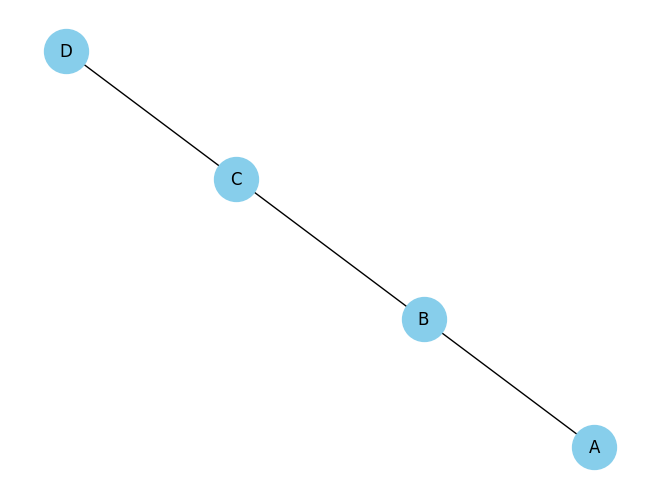

In [55]:
A = np.array([[0, 1, 0, 0],
              [1, 0, 1, 0],
              [0, 1, 0, 1],
              [0, 0, 1, 0]], dtype=np.float64)

G = nx.from_numpy_array(A)
G = nx.relabel_nodes(G, {0: "A", 1: "B", 2: "C", 3: "D"})
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue")

In [56]:
L = laplacian(A)
L

array([[ 1., -1.,  0.,  0.],
       [-1.,  2., -1.,  0.],
       [ 0., -1.,  2., -1.],
       [ 0.,  0., -1.,  1.]])

In [57]:
eigenvalues, eigenfunctions = lg.eig(L)

# Sort the eigenvalues in increasing order.
idx = eigenvalues.argsort()
eigenvalues = eigenvalues[idx]
eigenfunctions = eigenfunctions[:,idx]

np.set_printoptions(precision=3, suppress=True)
eigenvalues.real

array([0.   , 0.586, 2.   , 3.414])

In [58]:
def plot_eigenfunctions(eigenvalues, eigenfunctions):
  labels = list(map(lambda e: f"{e:.2f}", eigenvalues))
  pl.plot(eigenfunctions.real, label=labels)
  pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  pl.xticks(np.arange(len(eigenvalues)))
  pl.xlabel("Nodes")
  pl.ylabel("Values")
  pl.title("Eigenfunctions")
  pl.grid(True)

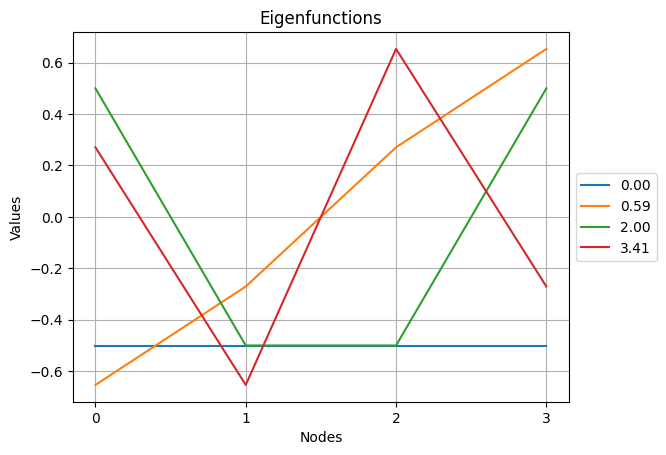

In [59]:
plot_eigenfunctions(eigenvalues.real, eigenfunctions.real)
pl.savefig("./images/line_graph_eigenfunctions.pdf", bbox_inches="tight")

## Cyclic graph

In [60]:
def compute_eigenfunctions(adjacency, sort=True, plot=False, filename="eigenfunctions"):
    L = laplacian(adjacency)
    eigenvalues, eigenfunctions = lg.eig(L)
    if sort:
        idx = eigenvalues.argsort()
        eigenvalues = eigenvalues[idx]
        eigenfunctions = eigenfunctions[:,idx]
    if plot:
        plot_eigenfunctions(eigenvalues.real, eigenfunctions.real)
        if filename:
            pl.savefig(f"{filename}.pdf", bbox_inches="tight")
    else:
        return eigenvalues, eigenfunctions

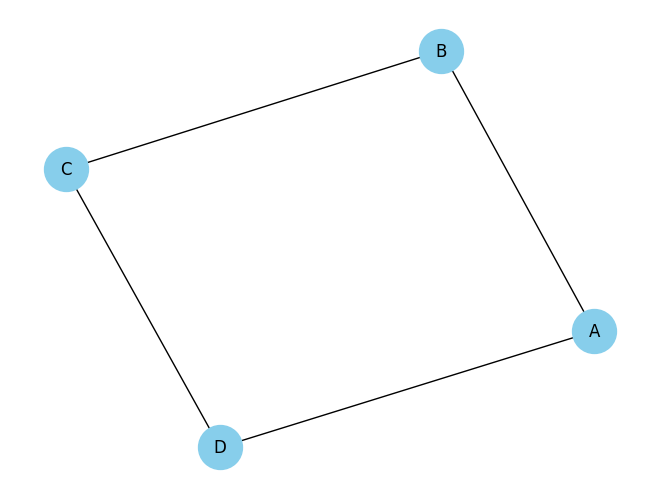

In [61]:
A = np.array([[0, 1, 0, 1],
              [1, 0, 1, 0],
              [0, 1, 0, 1],
              [1, 0, 1, 0]], dtype=np.float64)

G = nx.from_numpy_array(A)
G = nx.relabel_nodes(G, {0: "A", 1: "B", 2: "C", 3: "D"})
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue")

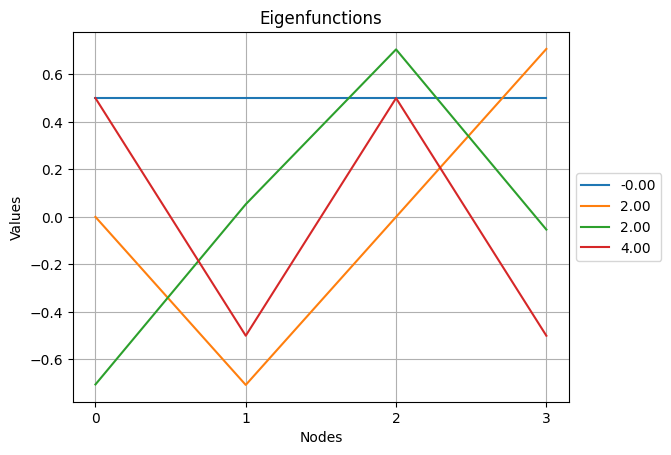

In [62]:
compute_eigenfunctions(A, filename="./images/cyclic_graph_eigenfunctions", plot=True)

## Star graph

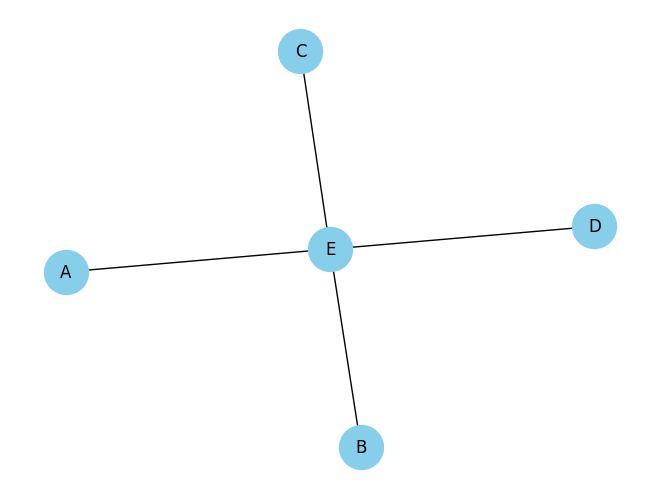

In [63]:
A = np.array([[0, 0, 0, 0, 1],
              [0, 0, 0, 0, 1],
              [0, 0, 0, 0, 1],
              [0, 0, 0, 0, 1],
              [1, 1, 1, 1, 0]], dtype=np.float64)

G = nx.from_numpy_array(A)
G = nx.relabel_nodes(G, {0: "A", 1: "B", 2: "C", 3: "D", 4: "E"})
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue")

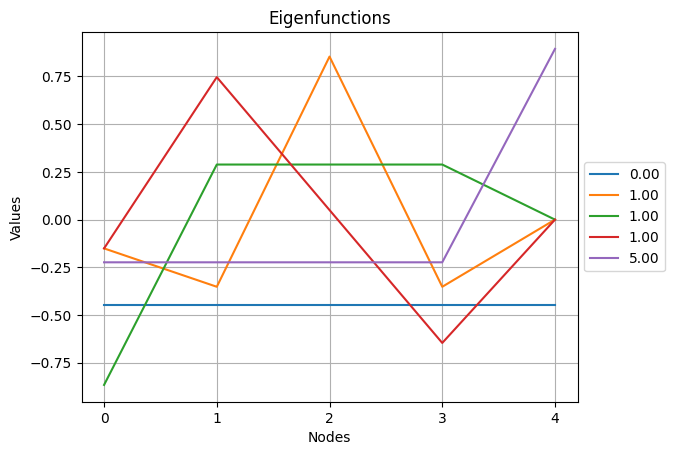

In [64]:
compute_eigenfunctions(A, filename="./images/star_graph_eigenfunctions", plot=True)

## Complete graph

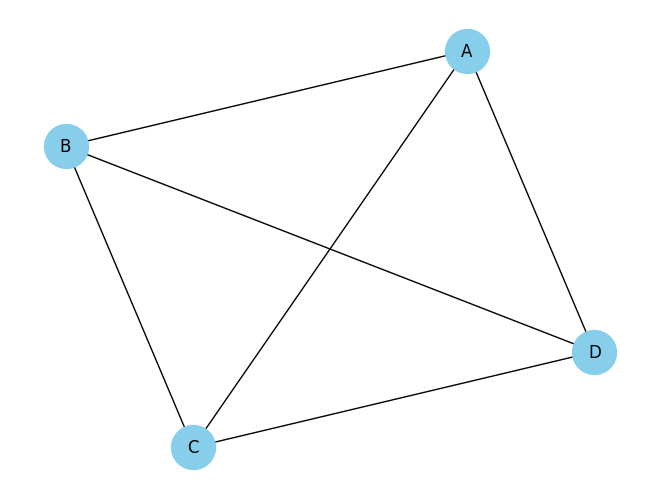

In [65]:
A = np.array([[0, 1, 1, 1],
              [1, 0, 1, 1],
              [1, 1, 0, 1],
              [1, 1, 1, 0]], dtype=np.float64)

G = nx.from_numpy_array(A)
G = nx.relabel_nodes(G, {0: "A", 1: "B", 2: "C", 3: "D"})
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue")

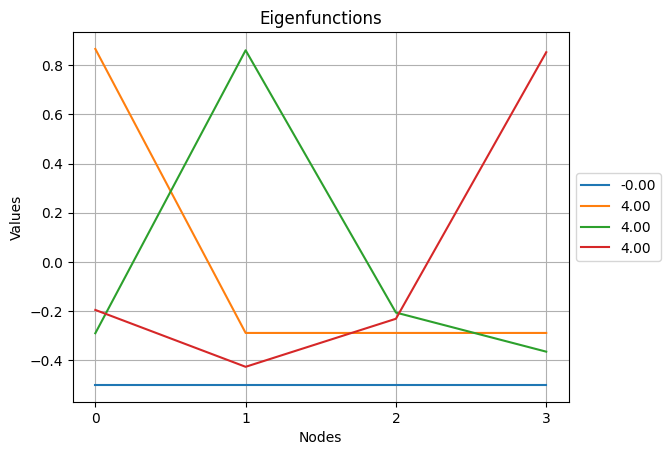

In [66]:
compute_eigenfunctions(A, filename="./images/complete_graph_eigenfunctions", plot=True)

## Multiple connected components

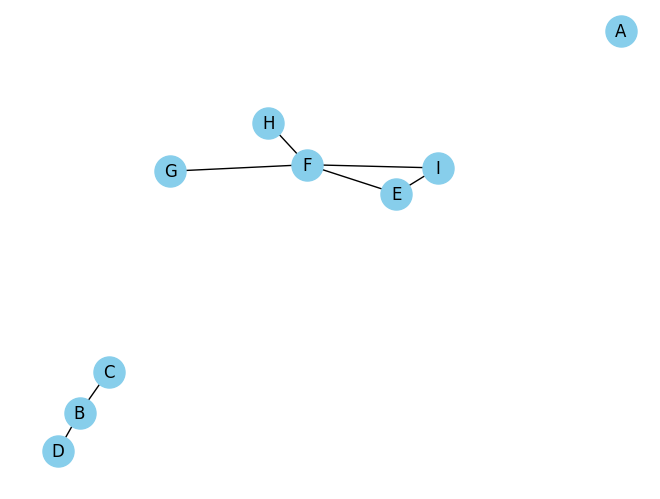

In [67]:
A = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 1, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 1],
              [0, 0, 0, 0, 1, 0, 1, 1, 1],
              [0, 0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 1, 1, 0, 0, 0]], dtype=np.float64)

G = nx.from_numpy_array(A)
G = nx.relabel_nodes(G, {0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H", 8: "I", 9: "J"})
nx.draw(G, with_labels=True, node_size=500, node_color="skyblue")

In [68]:
L = laplacian(A)
L

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  2., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., -1.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.,  4., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  2.]])

In [69]:
eigenvalues, eigenfunctions = compute_eigenfunctions(A)
print(eigenvalues.real)
print(eigenfunctions[:,0])

[-0.  0.  0.  1.  1.  1.  3.  3.  5.]
[ 0.    -0.027 -0.027 -0.027  0.447  0.447  0.447  0.447  0.447]


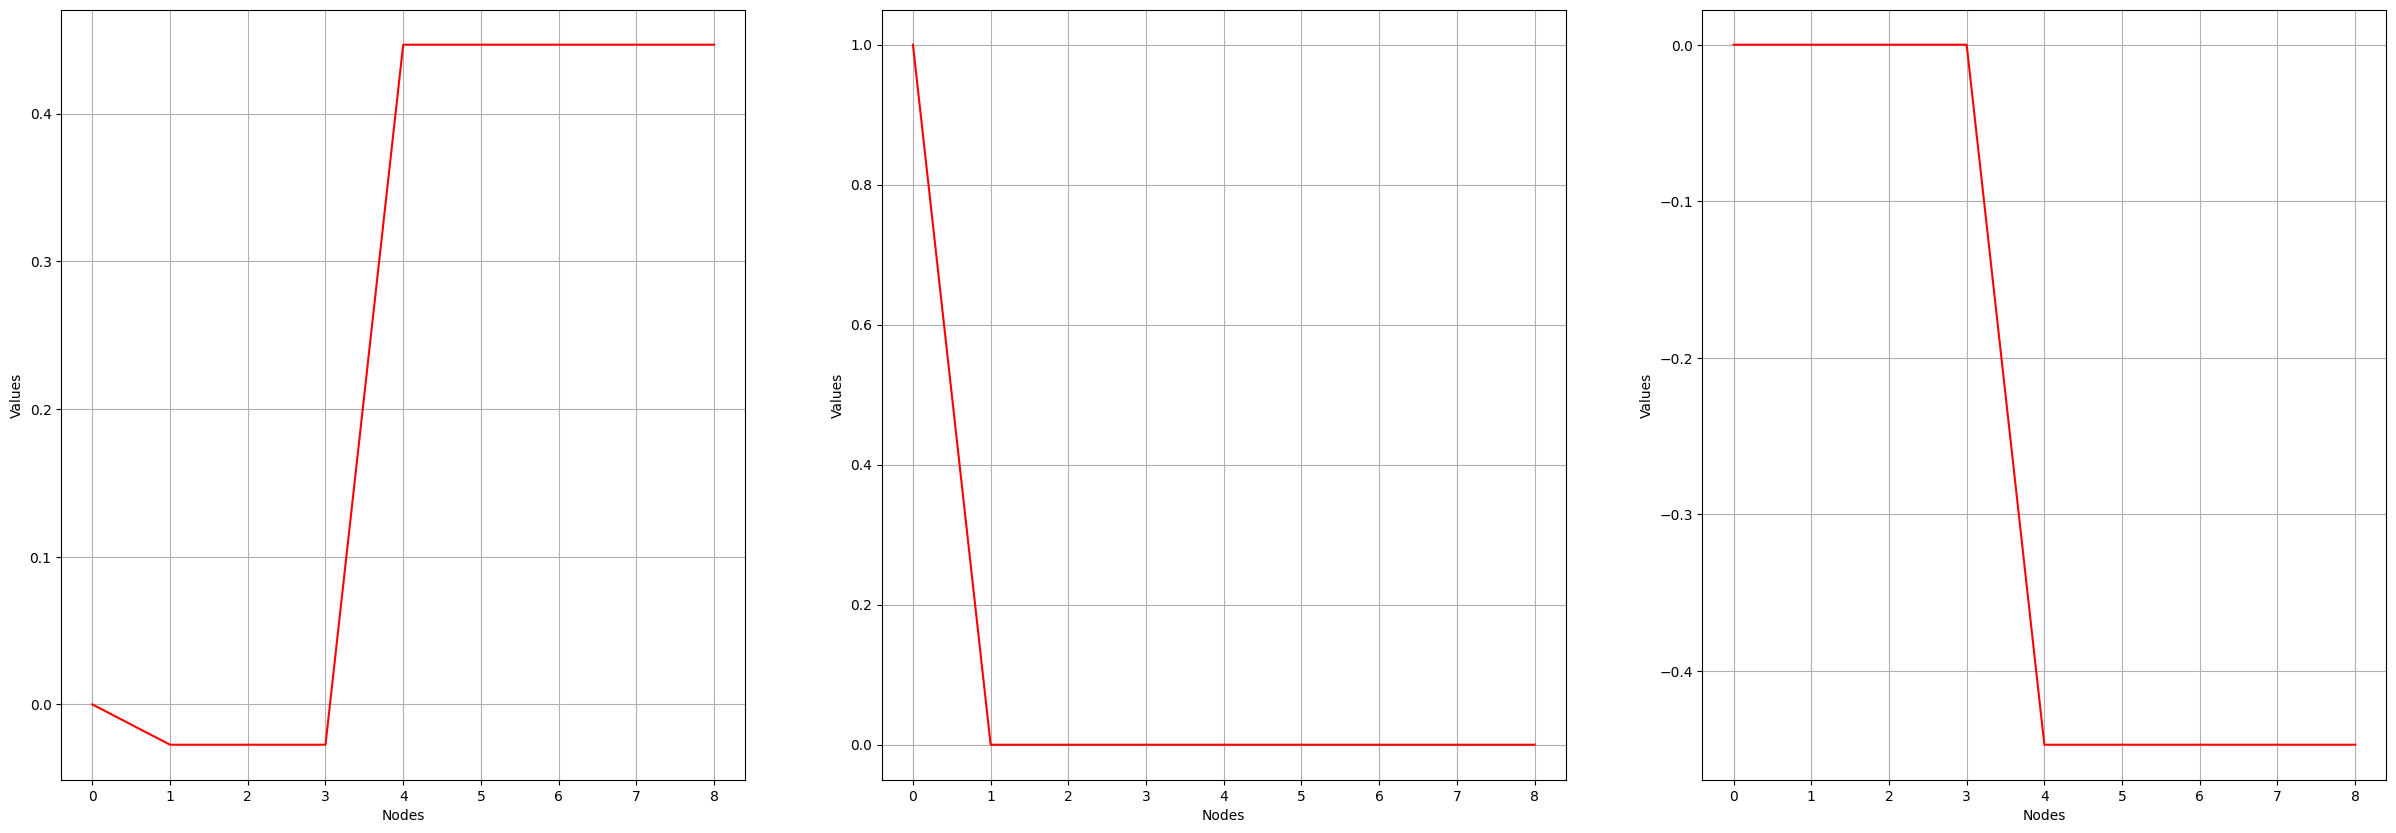

In [70]:
fig, ax = pl.subplots(1, 3)
fig.set_size_inches((30, 10))

ax[0].plot(eigenfunctions[:,0].real, color="red")
ax[0].set_xticks(np.arange(len(eigenvalues)))
ax[0].set_xlabel("Nodes")
ax[0].set_ylabel("Values")
ax[0].grid(True)

ax[1].plot(eigenfunctions[:,1].real, color="red")
ax[1].set_xticks(np.arange(len(eigenvalues)))
ax[1].set_xlabel("Nodes")
ax[1].set_ylabel("Values")
ax[1].grid(True)

ax[2].plot(eigenfunctions[:,2].real, color="red")
ax[2].set_xticks(np.arange(len(eigenvalues)))
ax[2].set_xlabel("Nodes")
ax[2].set_ylabel("Values")
ax[2].grid(True)

## Fiedler vector

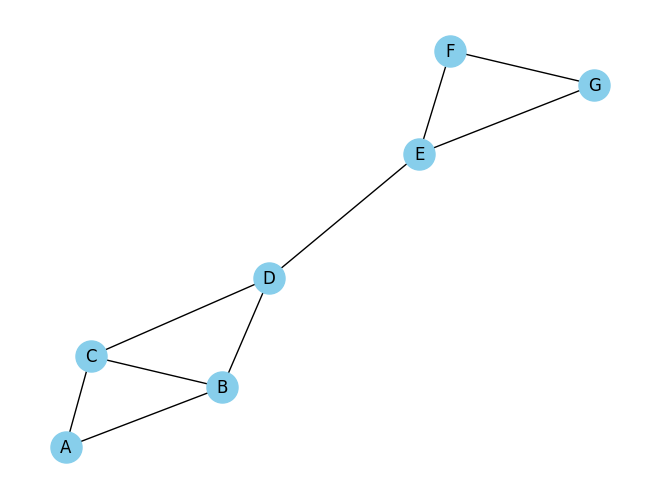

In [71]:
A = np.array([[0, 1, 1, 0, 0, 0, 0],
              [1, 0, 1, 1, 0, 0, 0],
              [1, 1, 0, 1, 0, 0, 0],
              [0, 1, 1, 0, 1, 0, 0],
              [0, 0, 0, 1, 0, 1, 1],
              [0, 0, 0, 0, 1, 0, 1],
              [0, 0, 0, 0, 1, 1, 0]], dtype=np.float64)

G = nx.from_numpy_array(A)
G = nx.relabel_nodes(G, {0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G"})
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue")

In [72]:
eigenvalues, eigenfunctions = compute_eigenfunctions(A, sort=True, plot=False)
eigenvalues.real

array([-0.   ,  0.359,  2.276,  3.   ,  3.589,  4.   ,  4.776])

In [73]:
eigenfunctions[:,1]

array([-0.424, -0.348, -0.348, -0.147,  0.308,  0.48 ,  0.48 ])